# Plotting the results -- Scenario II

In this notebook, we plot the results, i.e., the spectral efficiency obtained by using the *delay blind*, the *hybrid*, and the *E2E* appraoch under Scenario II. We assume that there are trained models stored in a folder to load and directly test. 

The reader can test the trained models on a dataset of channel realizations with a relative speed of 60 km/h (16.67 m/s), i.e., "Datasets/ITU_VEHICULAR_B_5000_60kmph.npy".

Instead of running the models, the reader can directly load and plot the spectral efficiencies obtained by the three methods over the test dataset, by setting the parameter `load_from_memory` to `True`. This can be done also for a test dataset with relative speed of 120 km/h (33.33 m/s), by setting the parameter `relative_speed` to `33.33`.

## Import libraries and utility functions

In [1]:
import numpy as np
import utilities as utils
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcdefaults()
matplotlib.rcParams.update( { 'font.size': 22,
                              'lines.linewidth': 4,
                              'lines.markersize': 15 } )

In [2]:
%run setup.ipynb

Using TensorFlow backend.


## Test the trained models

In [3]:
# Test set
TEST_SET = 'Datasets/ITU_VEHICULAR_B_5000_60kmph.npy'
# Relative speed between the base station and the mobile user equipemnt.It must be coherenr with the selected "FADING_CHANNEL_DATAFILE"
relative_speed = 16.67
DOPPLER = (2e9 / 3e8) * relative_speed     
DATASET = np.load( TEST_SET, allow_pickle = True )[()]
NROF_FRAMES, NROF_SUBCARRIERS, NROF_SNRS = DATASET['channel'].shape
NROF_MCS = len( DATASET[ 'block_sizes' ] )
BLOCK_SIZES = DATASET[ 'block_sizes' ]
# Snrs set that we consider
snrs_set = [5,15, 25]
tx_bw = 15e3 * 72 # Tranmission Bandwidth
load_from_memory = True # Flag to skip running the models and directly load the spectral efficiencies from the memory
# Maximum feedback delat that we consider
maximum_delay = 9

tput_HYBRID = []
tput_DELAY_BLIND = []
tput_E2E = []


delays = range( 0, maximum_delay + 1)

nrof_delays = len( delays )

if load_from_memory == True:
    
    if relative_speed == 33.33:
        
        tput_DELAY_BLIND = np.load('Trained_models_ScenarioII/tput_DELAY-BLIND_sc_II_222.npy')
        tput_HYBRID = np.load('Trained_models_ScenarioII/tput_HYBRID_sc_II_222.npy')
        tput_E2E = np.load('Trained_models_ScenarioII/tput_E2E_sc_II_222.npy')
        
    if relative_speed == 16.67:
        
        tput_DELAY_BLIND = np.load('Trained_models_ScenarioII/tput_DELAY-BLIND_sc_II_111.npy')
        tput_HYBRID = np.load('Trained_models_ScenarioII/tput_HYBRID_sc_II_111.npy')
        tput_E2E = np.load('Trained_models_ScenarioII/tput_E2E_sc_II_111.npy')

else:

    for DELAY in delays:

        print( 'Simulating a channel reporting delay of %d ms'%( DELAY) )   


        E2E_MODEL_FILE = 'Trained_models_ScenarioII/ANN_E2E_MCS_PRED_DELAY_%d_MEM_10_SNR.h5'%( DELAY )
        HYBRID_MODEL_FILE='Trained_models_ScenarioII/ANN_MCS_PRED_WIENER_FILT_COEFF_AVERAGE_DELAY_%d.h5' %( DELAY ) 
        DELAY_BLIND_MODEL_FILE='Trained_models_ScenarioII/ANN_MCS_PRED.h5'

        tputs, \
        error_rates, \
        mse, \
        ack_prob    = computation( TEST_SET,
                                   HYBRID_MODEL_FILE,
                                   DELAY_BLIND_MODEL_FILE,
                                   E2E_MODEL_FILE,
                                   DELAY,
                                   DOPPLER,
                                   noise=True,
                                   train_fraction=0.2)

        tput_DELAY_BLIND.append( tputs['ann_delayed'] )
        tput_HYBRID.append( tputs['ann_ch_pr'] )
        tput_E2E.append( tputs['ann_e2e'] )


## Plotting

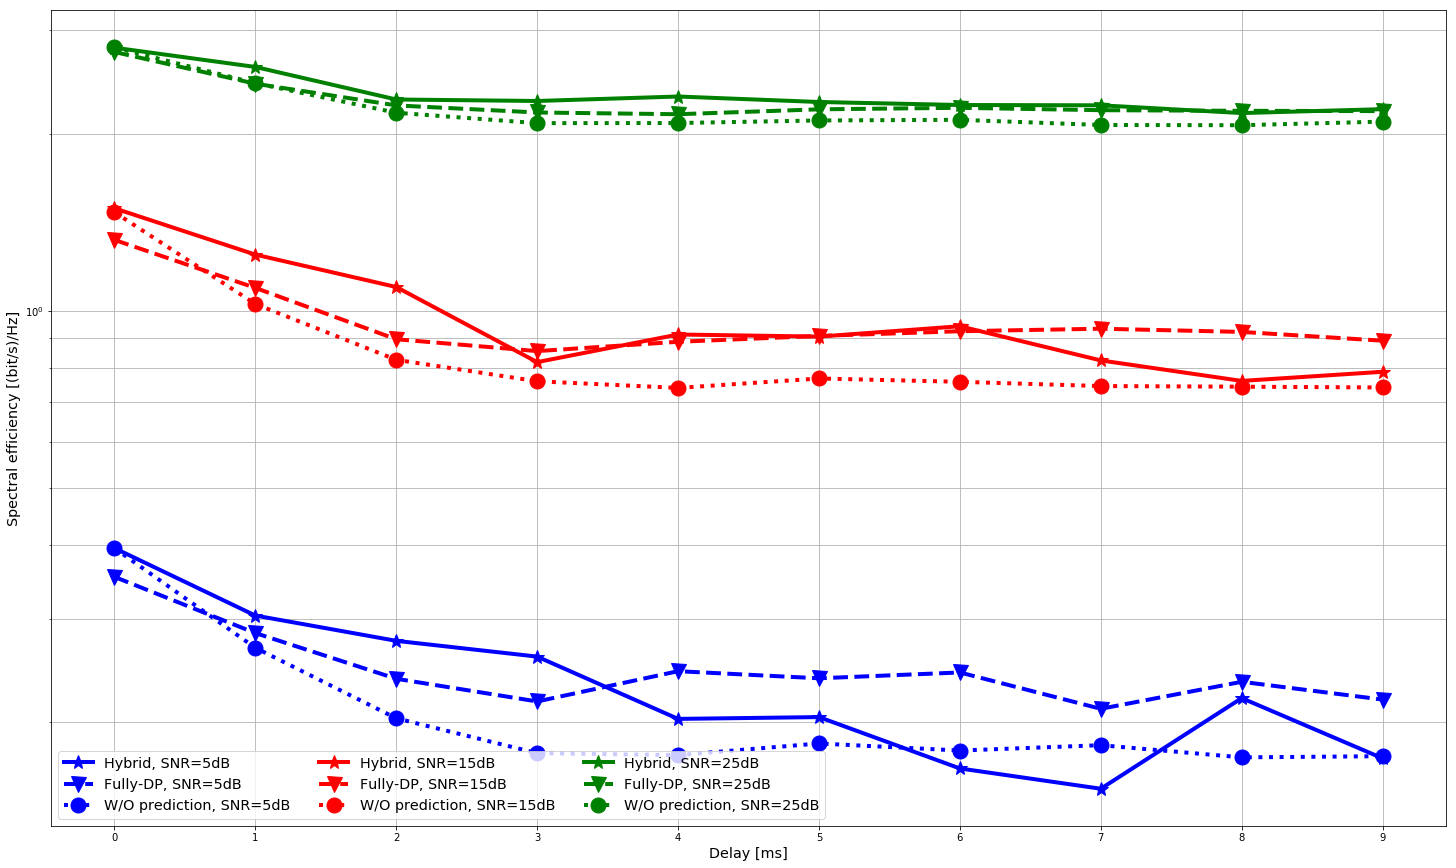

In [4]:
SNR=5
tput_DELAY_BLIND_5   = np.array([tput_DELAY_BLIND[i][SNR-1] for i in range( nrof_delays )])
tput_HYBRID_5     = np.array([tput_HYBRID[i][SNR-1] for i in range( nrof_delays )])
tput_E2E_5       = np.array([tput_E2E[i][SNR-1] for i in range( nrof_delays )])

SNR=15
tput_DELAY_BLIND_15   = np.array([tput_DELAY_BLIND[i][SNR-1] for i in range( nrof_delays )])
tput_HYBRID_15     = np.array([tput_HYBRID[i][SNR-1] for i in range( nrof_delays )])
tput_E2E_15       = np.array([tput_E2E[i][SNR-1] for i in range( nrof_delays )])

SNR=25
tput_DELAY_BLIND_25   = np.array([tput_DELAY_BLIND[i][SNR-1] for i in range( nrof_delays )])
tput_HYBRID_25     = np.array([tput_HYBRID[i][SNR-1] for i in range( nrof_delays )])
tput_E2E_25       = np.array([tput_E2E[i][SNR-1] for i in range( nrof_delays )])

plt.figure( figsize = [ 25, 15 ] )
plt.ylabel('Spectral efficiency [(bit/s)/Hz]',fontsize= 'x-large')
plt.xlabel('Delay [ms]',fontsize= 'x-large')
plt.semilogy( delays, tput_HYBRID_5 / tx_bw, marker = '*',color='b',label='Hybrid, SNR=5dB' )
plt.semilogy( delays, tput_E2E_5 / tx_bw, marker = 'v',linestyle='--',color='b',label='Fully-DP, SNR=5dB' )
plt.semilogy( delays, tput_DELAY_BLIND_5 / tx_bw, marker = 'o',linestyle=':',color='b',label='W/O prediction, SNR=5dB' )

plt.semilogy( delays, tput_HYBRID_15 / tx_bw, marker = '*',color='r',label='Hybrid, SNR=15dB' )
plt.semilogy( delays, tput_E2E_15 / tx_bw, marker = 'v',linestyle='--',color='r',label='Fully-DP, SNR=15dB' )
plt.semilogy( delays, tput_DELAY_BLIND_15 / tx_bw, marker = 'o',linestyle=':',color='r',label='W/O prediction, SNR=15dB' )

plt.semilogy( delays, tput_HYBRID_25 / tx_bw, marker = '*',color='g',label='Hybrid, SNR=25dB' )
plt.semilogy( delays, tput_E2E_25 / tx_bw, marker = 'v',linestyle='--',color='g',label='Fully-DP, SNR=25dB' )
plt.semilogy( delays, tput_DELAY_BLIND_25 / tx_bw, marker = 'o',linestyle=':',color='g',label='W/O prediction, SNR=25dB' )

plt.xticks(np.arange(0, 10, step=1))
plt.grid(which='both')
plt.legend(fontsize= 'x-large',loc='lower left',ncol=3)
plt.show()

    